# Петров Сергей

# Домашнее задание
Нужно написать модель такую, что:
- метод обучения модели: стохастический градиентный спуск с мини-пакетами(mini-batch): на каждой итерации обновления весов градиент должен быть вычислен как средний от N наблюдений;<br>
- в функцию ошибки добавлен ElasticNet;<br>
- лейблы классов\$  Y = \\{0, 1\\}\$.<br>

## Импорт

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

r_state = 42

## Работа с информацией

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df['income'] = (df['income'] == '>50K').astype(int)

In [5]:
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

### Численные колонки

In [6]:
num_cols = list(df.select_dtypes(include=np.number).columns)
df[num_cols].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### Анализ колонок

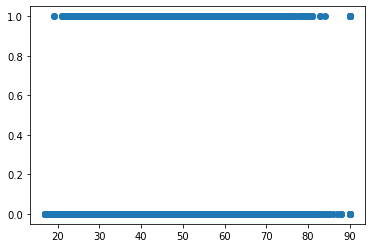

In [7]:
plt.scatter(df['age'], df['income'])

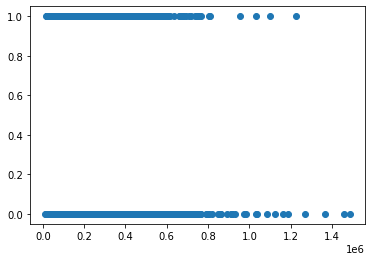

In [8]:
plt.scatter(df['fnlwgt'], df['income'])

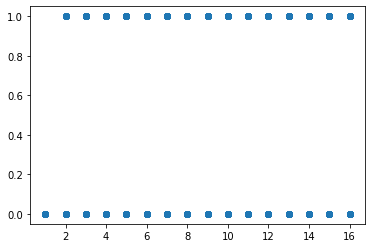

In [9]:
plt.scatter(df['education.num'], df['income'])

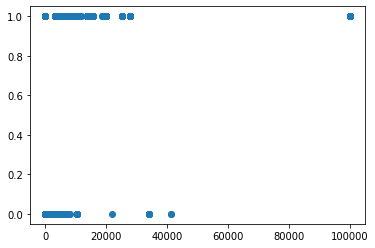

In [10]:
plt.scatter(df['capital.gain'], df['income'])

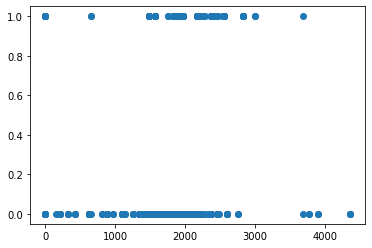

In [11]:
plt.scatter(df['capital.loss'], df['income'])

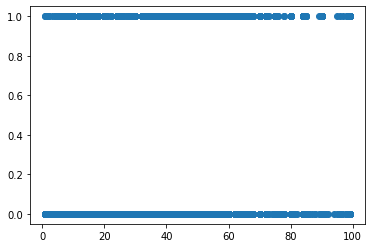

In [12]:
plt.scatter(df['hours.per.week'], df['income'])

### Категорилаьные колонки

In [13]:
cat_cols = list(df.drop(num_cols + ['income'], axis=1).columns)
cat_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [14]:
df[cat_cols] = OrdinalEncoder().fit_transform(df[cat_cols])

In [15]:
df[cat_cols]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,0.0,11.0,6.0,0.0,1.0,4.0,0.0,39.0
1,4.0,11.0,6.0,4.0,1.0,4.0,0.0,39.0
2,0.0,15.0,6.0,0.0,4.0,2.0,0.0,39.0
3,4.0,5.0,0.0,7.0,4.0,4.0,0.0,39.0
4,4.0,15.0,5.0,10.0,3.0,4.0,0.0,39.0
...,...,...,...,...,...,...,...,...
32556,4.0,15.0,4.0,11.0,1.0,4.0,1.0,39.0
32557,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0
32558,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0
32559,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0


### Анализ категориальных колонок

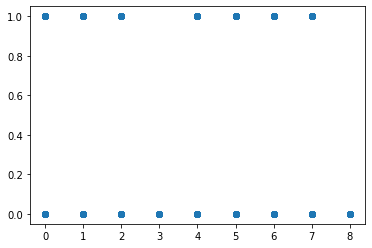

In [16]:
plt.scatter(df['workclass'], df['income'])

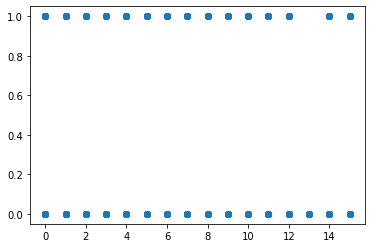

In [17]:
plt.scatter(df['education'], df['income'])

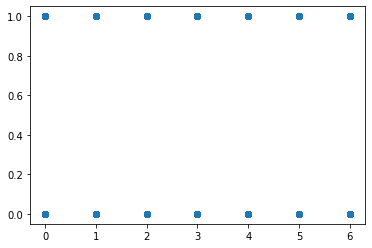

In [18]:
plt.scatter(df['marital.status'], df['income'])

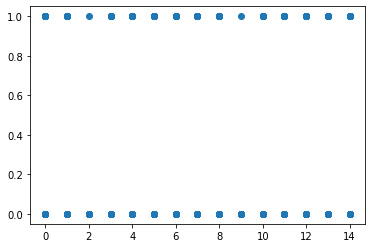

In [19]:
plt.scatter(df['occupation'], df['income'])

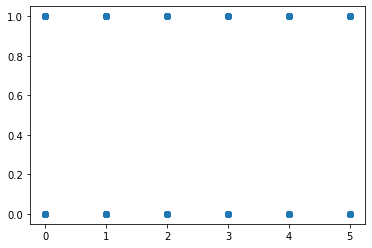

In [20]:
plt.scatter(df['relationship'], df['income'])

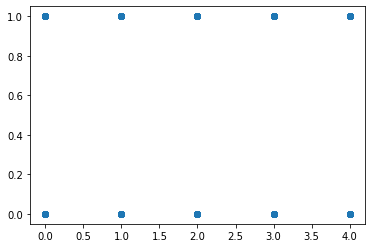

In [21]:
plt.scatter(df['race'], df['income'])

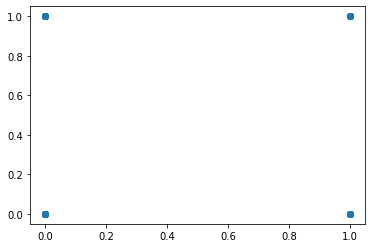

In [22]:
plt.scatter(df['sex'], df['income'])

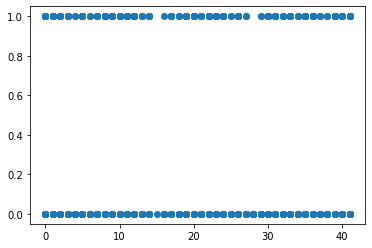

In [23]:
plt.scatter(df['native.country'], df['income'])

### Шкалирование

In [24]:
scaler = MinMaxScaler()
df[num_cols + cat_cols] = scaler.fit_transform(df[num_cols + cat_cols])
df[num_cols + cat_cols].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.120545,0.605379,0.010777,0.020042,0.402423,0.240810,0.483612,0.686547,0.435306,0.469481,0.289272,0.916464,0.669205,0.895582
std,0.186855,0.071685,0.171515,0.073854,0.092507,0.125994,0.427581,0.181995,0.258018,0.251037,0.302061,0.321354,0.212201,0.470506,0.190824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959,0.000000,0.500000,0.600000,0.333333,0.214286,0.000000,1.000000,0.000000,0.951220
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959,0.000000,0.500000,0.733333,0.333333,0.500000,0.200000,1.000000,1.000000,0.951220
75%,0.424658,0.152651,0.733333,0.000000,0.000000,0.448980,0.000000,0.500000,0.800000,0.666667,0.714286,0.600000,1.000000,1.000000,0.951220
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Финальная обработка

In [48]:
train_df, test_df = train_test_split(df,  test_size=0.25, random_state=r_state)

In [49]:
X_train = train_df[num_cols + cat_cols]
X_test = test_df[num_cols + cat_cols]

y_train = train_df['income'].to_numpy(dtype = int)*2-1
y_test = test_df['income'].to_numpy(dtype = int)*2-1

In [50]:
X = np.vstack([np.random.normal(size=10000), np.random.normal(size=10000)]).T

In [51]:
y = 1 / (1 + (np.exp(-(X[:, 0]*2 + X[:, 1]*7 + np.random.normal(size=10000)))))
y = (y > np.percentile(y, 5)).astype(int)

## Логистическая регрессия

In [74]:
sigmoid = lambda z: 1/(1+np.exp(-z))

def logloss(X, y, w, lamb1, lamb2):
    return -(y*np.log(sigmoid(X@w)) + (1 - y)* np.log(1 - sigmoid(X@w))).mean() + lamb1 * sum(abs(w)) + lamb2 * sum(w*w)

class LogisticRegression:
    def __init__(self, lr=1e-4, lamb1 = 0, lamb2 = 0):
        self.w = None
        self.b = None
        self.lr = lr
        self.lamb1 = lamb1
        self.lamb2 = lamb2


    def fit(self, X, y, c_epoch=1000, k = 4):
        
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        data = np.hstack([X, y.reshape(y.shape[0],1)])
        r, l = X.shape
        
        self.w = np.ones(l)
        
        
        print(X.shape)
        print(data[0])
        print(self.w.shape)
        
        for i in range(c_epoch):
            
            np.random.shuffle(data)
            
            for j in range(0, r - k,k):
                new_X = data[j:j + k, :-1]
                new_y = data[j:j + k, -1]
                self.w -= self.lr * ((sigmoid(new_X @ self.w) - new_y).T @ new_X/k + self.lamb1 * np.sign(self.w) + 2 * self.lamb2 * self.w )
            print(i,':', logloss(X, y, self.w, self.lamb1, self.lamb2))
        
        self.b = self.w[-1]
        self.w = self.w[:-1] 
            
    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)
    
    def predict(self, X): 
        return (sigmoid(X @ self.w + self.b) > 0.5).astype(int)

### Логрег на случайных числах

In [76]:
lr = LogisticRegression()

In [77]:
lr.fit(X, y, c_epoch = 100, k =1000)

(10000, 3)
[-0.55829382  1.19103194  1.          1.        ]
(3,)
0 : 0.4153099609468209
1 : 0.4152217732202795
2 : 0.41513372120141495
3 : 0.4150458849406005
4 : 0.4149579857159706
5 : 0.41486958081081127
6 : 0.41478096919253166
7 : 0.41469285527157324
8 : 0.414604524428274
9 : 0.414517166728489
10 : 0.4144291722310969
11 : 0.41434125152400647
12 : 0.414253383562175
13 : 0.41416553085368824
14 : 0.4140779789277356
15 : 0.413989737229175
16 : 0.41390198538410894
17 : 0.4138142372549383
18 : 0.413726480158557
19 : 0.4136388892623082
20 : 0.41355115462258146
21 : 0.4134637397744612
22 : 0.4133760176799942
23 : 0.41328841592545895
24 : 0.4132007784698882
25 : 0.4131135316341338
26 : 0.4130256184547461
27 : 0.41293776500939866
28 : 0.4128506104789044
29 : 0.412763357543443
30 : 0.41267606228015263
31 : 0.41258907370386066
32 : 0.41250200134705756
33 : 0.41241424883855604
34 : 0.412327139159279
35 : 0.41224094742572953
36 : 0.41215388014786886
37 : 0.4120663472190958
38 : 0.4119792230764285

In [79]:
accuracy_score(y, lr.predict(X))

0.8181

### Логрег на взрослых

In [56]:
lr.fit(X_train, y_train, c_epoch = 100, k =1000)

(24420, 16)
[0.28767123 0.11075305 0.33333333 0.         0.58746556 0.90816327
 1.         0.5        0.         0.66666667 0.71428571 0.2
 1.         1.         0.95121951 1.         1.        ]
(16,)
0 : 10.872878694003415
1 : 10.8465302300435
2 : 10.820162893465618
3 : 10.793806008227767
4 : 10.767428373462563
5 : 10.741085327866873
6 : 10.714718863227677
7 : 10.688362992063242
8 : 10.661989697011801
9 : 10.635614937364872
10 : 10.609258738452283
11 : 10.582894034898903
12 : 10.556531388013902
13 : 10.53016603039103
14 : 10.503800298223466
15 : 10.477451354472539
16 : 10.451088882910954
17 : 10.424717595207241
18 : 10.398363031747062
19 : 10.372013759415749
20 : 10.345625476563477
21 : 10.319284438528761
22 : 10.29292604743018
23 : 10.26656019541786
24 : 10.240199732136697
25 : 10.213856036291157
26 : 10.187508534913693
27 : 10.161180822294616
28 : 10.134822743781296
29 : 10.108493961901416
30 : 10.082117385146994
31 : 10.055773563711194
32 : 10.02943084583642
33 : 10.00308739371494

In [57]:
accuracy_score(y_train, lr.predict(X_train))

0.24148239148239148

In [58]:
accuracy_score(y_test, lr.predict(X_test))

0.23879130327969536

### Логрег на взрослых L1 регуляризация

In [59]:
lr1 = LogisticRegression(lamb1 = 5)

In [60]:
lr1.fit(X_train, y_train, c_epoch = 100, k =1000)

(24420, 16)
[0.28767123 0.11075305 0.33333333 0.         0.58746556 0.90816327
 1.         0.5        0.         0.66666667 0.71428571 0.2
 1.         1.         0.95121951 1.         1.        ]
(16,)
0 : 89.65153585822253
1 : 88.40375034088589
2 : 87.15591030598928
3 : 85.9082688763496
4 : 84.66054198612456
5 : 83.41275102026101
6 : 82.16521467502889
7 : 80.91770280080652
8 : 79.67014602443439
9 : 78.42267092716685
10 : 77.17512795473368
11 : 75.92775163611338
12 : 74.68042285361149
13 : 73.43307636502054
14 : 72.18575906619448
15 : 70.93848828869963
16 : 69.6911864946734
17 : 68.4441590305683
18 : 67.19731543318139
19 : 65.9505010165909
20 : 64.70371650486769
21 : 63.45710502718062
22 : 62.21068306104411
23 : 60.964398625100756
24 : 59.71834423017949
25 : 58.4724434394169
26 : 57.22671538502173
27 : 55.98131131504027
28 : 54.73603689256654
29 : 53.49107596297985
30 : 52.2464464232828
31 : 51.002181633010345
32 : 49.75825465855819
33 : 48.51476547062217
34 : 47.27190705784772
35 : 46

In [61]:
accuracy_score(y_train, lr1.predict(X_train))

0.0017608517608517608

In [62]:
accuracy_score(y_test, lr1.predict(X_test))

0.0015968554231666871

### Логрег на взрослых L2 регуляризация

In [63]:
lr2 = LogisticRegression(lamb2 = 5)

In [64]:
lr2.fit(X_train, y_train, c_epoch = 100, k =1000)

(24420, 16)
[0.28767123 0.11075305 0.33333333 0.         0.58746556 0.90816327
 1.         0.5        0.         0.66666667 0.71428571 0.2
 1.         1.         0.95121951 1.         1.        ]
(16,)
0 : 86.61190908161882
1 : 82.52530755047091
2 : 78.63056419860509
3 : 74.91829108193224
4 : 71.38032329060432
5 : 68.008215126223
6 : 64.79433809243764
7 : 61.731565296505906
8 : 58.812337485536716
9 : 56.03029942354337
10 : 53.37848667791408
11 : 50.851500452042416
12 : 48.443239088207285
13 : 46.148155712451945
14 : 43.96070492071252
15 : 41.876287386158076
16 : 39.88988180501973
17 : 37.99666446519845
18 : 36.19263710974999
19 : 34.473533362268824
20 : 32.83541948339638
21 : 31.27435927698449
22 : 29.78691407405343
23 : 28.369888273845262
24 : 27.019809814441928
25 : 25.73346194812444
26 : 24.507851756252748
27 : 23.340314440975973
28 : 22.22815713139991
29 : 21.16858739455266
30 : 20.15934754982213
31 : 19.19809623171397
32 : 18.282594765480237
33 : 17.410714579565322
34 : 16.5804236

In [65]:
accuracy_score(y_train, lr2.predict(X_train))

0.24148239148239148

In [66]:
accuracy_score(y_test, lr2.predict(X_test))

0.23879130327969536

### Логрег на взрослых Elastic net регуляризация

In [67]:
lr3 = LogisticRegression(lamb1 = 5, lamb2 = 5)

In [68]:
lr3.fit(X_train, y_train, c_epoch = 100, k =1000)

(24420, 16)
[0.28767123 0.11075305 0.33333333 0.         0.58746556 0.90816327
 1.         0.5        0.         0.66666667 0.71428571 0.2
 1.         1.         0.95121951 1.         1.        ]
(16,)
0 : 161.6675729659175
1 : 152.8687513035153
2 : 144.48266221692245
3 : 136.49009643233714
4 : 128.87244693819093
5 : 121.61233577445279
6 : 114.69271978965658
7 : 108.09797260558491
8 : 101.81357921699043
9 : 95.82405937087873
10 : 90.1166420569521
11 : 84.6773208182723
12 : 79.49381226463694
13 : 74.55451791863511
14 : 69.84833638209463
15 : 65.3640934671134
16 : 61.09203604764072
17 : 57.022326490973676
18 : 53.14585586884941
19 : 49.45362911930836
20 : 45.937470651134966
21 : 42.58925500581539
22 : 39.401726846722624
23 : 36.3675388467332
24 : 33.479837832721216
25 : 30.732160455953426
26 : 28.118160923509905
27 : 25.63196014462818
28 : 23.26775077151705
29 : 21.020286783469004
30 : 18.884047632149958
31 : 16.85409800040191
32 : 14.925685328413188
33 : 13.094139267765566
34 : 11.35467

In [69]:
accuracy_score(y_train, lr3.predict(X_train))

0.003276003276003276

In [70]:
accuracy_score(y_test, lr3.predict(X_test))

0.002948040781230807